# <center>L2 Computational Physics</center>
---
## Week 4: Differential Equations II

In this notebook, you will write a program to study the trajectory of a spherical, iron cannonball in the presence of gravity and drag forces. 

In [3]:
import numpy
from matplotlib import pyplot as plt

In [4]:
# Define all constants to be used in the simulation
r_cb = 0.15  # Radius of cannonball in m
rho_iron = 7874  # Density of iron in kg/m^3
g = 9.81  # Acceleration due to gravity in m/s^2
kappa = 0.47  # Drag coefficient of a sphere
rho_air = 1.23  # Density of air in kg/m^3
v0 = 125.00  # Initial speed in m/s

From this information, calculate the following two variables:

In [5]:
def get_area(r):
    ''' 
    This function returns the cross section area of a sphere of radius r. The returned 
    value is in the squared units of the unit of the radius argument.
    '''
    f = numpy.pi*r**2
    return f;

def get_mass(r):
    ''' 
    This function returns the mass of an iron sphere of radius r. The radius 
    should be given in meter and the return value is in kg.
    '''
    g =  numpy.pi*4/3*r**3*rho_iron
    return g;

area_cb = get_area(r_cb)
mass_cb = get_mass(r_cb)

In [6]:
# these tests are worth one mark
assert numpy.isclose(area_cb, 0.07068583470577035)
assert numpy.isclose(mass_cb, 111.31605249464711)

## The Differential Equations

Create a function `f` which calculates the right-hand side of the differential equation

$$ \frac{d}{dt}\left(\begin{array}{c}x\\y\\v_x \\v_y \end{array}\right) = f(x, y, v_x, v_y, t)$$

such that the differential equation represents the cannonball's motion as it moves through the air. 

- *Your function should accept two arguments:*
    - `r` *- a numpy array representing the cannonball's state, $(x, y, v_{x}, v_{y})$.*
    - `t` *- Time * 
    
- *The drag force experienced by the cannonball is given by $$\vec{F}_{\textrm{d}} = - \frac{1}{2} C_{\textrm{d}} \rho |\vec{v}|^{2} A \widehat{v}~,$$ where $\widehat{v}$ is a unit vector pointing in the direction of the cannonball's instantaneous velocity.*

In [7]:
def f(r, t):
    '''Implements differential equation for cannonball from state vector r and time t'''
    
    # Unpack array of the state
    x, y, vx, vy = r
    
    # these variables should updated in your code to be the derivatives of 
    # the x, y positions and the derivative of the x, y velocities. 
    dx_t, dy_dt, dvx_dt, dvy_dt = 0, 0, 0, 0
    alpha = 1/2*kappa*rho_air*area_cb
    beta  = mass_cb*g 
    #velocities
    dx_dt = vx
    dy_dt = vy
    #constants
    mag_v_sqrd = (dx_dt)**2+(dy_dt)**2
    v_normalised_x = dx_dt/numpy.sqrt((dx_dt)**2+(dy_dt)**2)
    v_normalised_y = dy_dt/numpy.sqrt((dx_dt)**2+(dy_dt)**2)
    #odes
    dvx_dt = v_normalised_x*(- alpha*mag_v_sqrd)/(mass_cb)
    dvy_dt = -beta/mass_cb + v_normalised_y* (- alpha*mag_v_sqrd)/mass_cb
    
    
    print(numpy.array([dx_dt, dy_dt, dvx_dt, dvy_dt]))
    return numpy.array([dx_dt, dy_dt, dvx_dt, dvy_dt])
    

Check your result:

In [8]:
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
assert len(f(r_test, 0))== 4

[ 88.38834765  88.38834765  -2.0279283  -11.8379283 ]


In [9]:
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
assert numpy.isclose(f(r_test, 0), [ 88.38834765,  88.38834765,  -2.0279283 , -11.8379283 ]).all()

[ 88.38834765  88.38834765  -2.0279283  -11.8379283 ]


## Solving the Differential Equations

Create the function `solve_euler(state_initial, t1, n_panels)` which solves the differential equations using Euler's method.

- `state_initial` *is a numpy array containing the initial conditions $(x_{0}, y_{0}, v_{x0}, v_{y0})$*
- *When working with a numpy array, you can use the same commands as those used for single variables - for instance,* `state += f(state, t)`.
- *This function should record all state values at each timepoint in the variable `history` and return it. This will be similar to last week, only this time you will have to populate a 2D array.* 


In [169]:
def solve_euler(state_initial, t1, n_steps):
    '''Solves ODE using Euler's method from state_initial to end time t1 using n_panels panels'''
    # Define array for trajectory history
    history = numpy.zeros((n_steps+1,4))  # Number of columns is equal to number of variables to solve for (4)
    history[0] = state_initial
    # you should now populate the history array
    dt = t1/n_steps
    for i in range(0,n_steps):
            history[1:i+1] = history [i] +f(history[i],0)*dt   
    return history
print(solve_euler())


Test your solution:

In [171]:
# this test is worth 4 marks
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
assert numpy.isclose(solve_euler(r_test, 25.0, 10), numpy.array(
    [[   0.        ,    0.        ,   88.38834765,   88.38834765],
     [ 220.97086912,  220.97086912,   83.3185269 ,   58.7935269 ],
     [ 429.26718637,  367.95468637,   79.41984538,   31.51743125],
     [ 627.81679983,  446.7482645 ,   76.30595276,    5.75669607],
     [ 818.58168171,  461.14000469,   73.62655732,  -18.97044366],
     [1002.64807501,  413.71389553,   71.05785323,  -42.83359748],
     [1180.2927081 ,  306.62990184,   68.35253688,  -65.72783569],
     [1351.1740503 ,  142.31031262,   65.37829955,  -87.3928075 ],
     [1514.61979917,  -76.17170612,   62.10406078, -107.54105068],
     [1669.87995113, -345.02433282,   58.56508321, -125.93786257],
     [1816.29265915, -659.86898925,   54.83262575, -142.43661744]])).all()

4
4
4
4
4
4
4
4
4
4


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


AssertionError: 

## Finding the range

To find the range of the projectile we will look for the $x$ coordinate when the trajectory crosses the $y=0$ line. In most cases that point will not be one of the steps but will be between two steps. We will use a linear approximation to determine this point given the last point with a positive $y$ value and the first point with a negative $y$ value. Implement the function `find_zero_linear` that takes as argument the two values of $x$ `x1` and `x2` and the heights `y1` and `y2` and returns the value of $x$ at which the line between $(x_1,y_1)$ and $x_2,y_2$ crosses the $y=0$ line.  

In [15]:

def find_zero_linear(x1, x2, y1, y2):
    #m = (y1 - y2)/(x1-x2)
    #c = y1 - grad*x1
    #print(c,m)
    #   return 
    if y1*y2<0:
        m = (y1-y2)/(x1-x2)
        c = y1 - m*x1
    return -c/m;
    
    

In [16]:
# these tests are worth 2 marks
assert numpy.isclose(find_zero_linear(-1,1,3,-3),0.0)
assert numpy.isclose(find_zero_linear(-1,1,1,-3), -0.5)

Given the function above we can define a function to determine the range. (Don't modify it!)

In [19]:
def find_range(history):
    all_xs = history[:,0]
    all_ys = history[:,1]
    negatives = numpy.argwhere(all_ys<0)
    if len(negatives) == 0 :
        print ("The projectile did not touch down! Returning the last known location")
        return all_xs[-1]
    (index,) = negatives[0]
    y1, y2 = all_ys[index-1], all_ys[index]
    x1, x2 = all_xs[index -1], all_xs[index]
    return find_zero_linear(x1,x2,y1,y2)

In [20]:
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
h = solve_euler(r_test, 25.0, 10000)
assert numpy.isclose(find_range(h),1306.2541)

[ 88.38834765  88.38834765  -2.0279283  -11.8379283 ]
[ 88.38327783  88.35875283  -2.02741436 -11.83685178]
[ 88.37820929  88.3291607   -2.02690058 -11.83577568]
[ 88.37314204  88.29957126  -2.02638696 -11.83469999]
[ 88.36807607  88.26998451  -2.0258735  -11.83362471]
[ 88.36301139  88.24040045  -2.0253602  -11.83254985]
[ 88.35794799  88.21081907  -2.02484706 -11.8314754 ]
[ 88.35288587  88.18124038  -2.02433408 -11.83040135]
[ 88.34782504  88.15166438  -2.02382126 -11.82932772]
[ 88.34276548  88.12209106  -2.0233086  -11.82825451]
[ 88.33770721  88.09252043  -2.0227961  -11.8271817 ]
[ 88.33265022  88.06295247  -2.02228375 -11.8261093 ]
[ 88.32759451  88.0333872   -2.02177157 -11.82503732]
[ 88.32254008  88.0038246   -2.02125954 -11.82396575]
[ 88.31748693  87.97426469  -2.02074768 -11.82289458]
[ 88.31243506  87.94470745  -2.02023597 -11.82182383]
[ 88.30738447  87.91515289  -2.01972443 -11.82075349]
[ 88.30233516  87.88560101  -2.01921304 -11.81968356]
[ 88.29728713  87.8560518   

[ 85.02572727  67.57711433  -1.69498576 -11.15714809]
[ 85.02148981  67.54922146  -1.69457871 -11.15633577]
[ 85.01725336  67.52133062  -1.6941718  -11.15552376]
[ 85.01301793  67.49344181  -1.69376503 -11.15471207]
[ 85.00878352  67.46555503  -1.69335839 -11.1539007 ]
[ 85.00455012  67.43767028  -1.69295189 -11.15308965]
[ 85.00031774  67.40978756  -1.69254553 -11.15227892]
[ 84.99608638  67.38190686  -1.69213931 -11.15146851]
[ 84.99185603  67.35402819  -1.69173322 -11.15065842]
[ 84.9876267   67.32615154  -1.69132728 -11.14984864]
[ 84.98339838  67.29827692  -1.69092146 -11.14903919]
[ 84.97917108  67.27040432  -1.69051579 -11.14823006]
[ 84.97494479  67.24253375  -1.69011026 -11.14742124]
[ 84.97071951  67.21466519  -1.68970486 -11.14661274]
[ 84.96649525  67.18679866  -1.68929959 -11.14580456]
[ 84.962272    67.15893415  -1.68889447 -11.1449967 ]
[ 84.95804976  67.13107166  -1.68848948 -11.14418915]
[ 84.95382854  67.10321119  -1.68808463 -11.14338193]
[ 84.94960833  67.07535273  

[ 82.55843507  50.48269936  -1.46638819 -10.7066647 ]
[ 82.5547691   50.4559327   -1.46606413 -10.70603101]
[ 82.55110394  50.42916762  -1.46574021 -10.70539758]
[ 82.54743959  50.40240413  -1.46541641 -10.7047644 ]
[ 82.54377605  50.37564222  -1.46509274 -10.70413147]
[ 82.54011332  50.34888189  -1.46476919 -10.70349879]
[ 82.53645139  50.32212314  -1.46444578 -10.70286636]
[ 82.53279028  50.29536598  -1.4641225  -10.70223418]
[ 82.52912997  50.26861039  -1.46379934 -10.70160226]
[ 82.52547047  50.24185639  -1.46347632 -10.70097059]
[ 82.52181178  50.21510396  -1.46315342 -10.70033917]
[ 82.5181539   50.18835311  -1.46283065 -10.699708  ]
[ 82.51449682  50.16160384  -1.46250801 -10.69907708]
[ 82.51084055  50.13485615  -1.4621855  -10.69844641]
[ 82.50718509  50.10811003  -1.46186312 -10.69781599]
[ 82.50353043  50.08136549  -1.46154087 -10.69718582]
[ 82.49987658  50.05462253  -1.46121874 -10.6965559 ]
[ 82.49622353  50.02788114  -1.46089675 -10.69592624]
[ 82.49257129  50.00114132  

[ 80.33505446  33.41758959  -1.28296169 -10.34368343]
[ 80.33184706  33.39173039  -1.2827204  -10.34319145]
[ 80.32864026  33.36587241  -1.28247924 -10.34269965]
[ 80.32543406  33.34001566  -1.28223821 -10.34220804]
[ 80.32222846  33.31416014  -1.28199731 -10.34171662]
[ 80.31902347  33.28830585  -1.28175653 -10.34122537]
[ 80.31581908  33.26245278  -1.28151588 -10.34073432]
[ 80.31261529  33.23660095  -1.28127535 -10.34024344]
[ 80.3094121   33.21075034  -1.28103495 -10.33975275]
[ 80.30620951  33.18490096  -1.28079468 -10.33926224]
[ 80.30300753  33.1590528   -1.28055454 -10.33877192]
[ 80.29980614  33.13320587  -1.28031452 -10.33828178]
[ 80.29660535  33.10736017  -1.28007463 -10.33779183]
[ 80.29340517  33.08151569  -1.27983487 -10.33730205]
[ 80.29020558  33.05567243  -1.27959523 -10.33681246]
[ 80.28700659  33.0298304   -1.27935573 -10.33632306]
[ 80.2838082   33.00398959  -1.27911634 -10.33583383]
[ 80.28061041  32.97815001  -1.27887709 -10.33534479]
[ 80.27741322  32.95231165  

[77.79407607 11.83985202 -1.12360351 -9.98100659]
[77.79126706 11.8148995  -1.12346974 -9.98063203]
[77.78845838 11.78994792 -1.12333609 -9.98025757]
[77.78565004 11.76499728 -1.12320256 -9.9798832 ]
[77.78284204 11.74004757 -1.12306916 -9.97950892]
[77.78003436 11.7150988  -1.12293588 -9.97913473]
[77.77722702 11.69015096 -1.12280273 -9.97876062]
[77.77442002 11.66520406 -1.1226697  -9.97838661]
[77.77161334 11.64025809 -1.1225368  -9.97801269]
[77.768807   11.61531306 -1.12240402 -9.97763886]
[77.76600099 11.59036896 -1.12227137 -9.97726512]
[77.76319531 11.5654258  -1.12213885 -9.97689146]
[77.76038997 11.54048357 -1.12200644 -9.9765179 ]
[77.75758495 11.51554228 -1.12187417 -9.97614443]
[77.75478026 11.49060192 -1.12174201 -9.97577104]
[77.75197591 11.46566249 -1.12160999 -9.97539775]
[77.74917188 11.44072399 -1.12147808 -9.97502454]
[77.74636819 11.41578643 -1.12134631 -9.97465142]
[77.74356482 11.39084981 -1.12121465 -9.97427839]
[77.74076179 11.36591411 -1.12108313 -9.97390545]


[76.04598522 -3.99492328 -1.06291513 -9.75416189]
[76.04332793 -4.01930868 -1.06285886 -9.75382206]
[76.04067078 -4.04369324 -1.0628027  -9.75348224]
[76.03801377 -4.06807694 -1.06274666 -9.75314245]
[76.03535691 -4.0924598  -1.06269074 -9.75280267]
[76.03270018 -4.1168418  -1.06263493 -9.75246292]
[76.03004359 -4.14122296 -1.06257923 -9.75212318]
[76.02738714 -4.16560327 -1.06252365 -9.75178345]
[76.02473084 -4.18998273 -1.06246818 -9.75144375]
[76.02207467 -4.21436134 -1.06241283 -9.75110406]
[76.01941863 -4.2387391  -1.06235759 -9.75076439]
[76.01676274 -4.26311601 -1.06230246 -9.75042474]
[76.01410698 -4.28749207 -1.06224745 -9.7500851 ]
[76.01145136 -4.31186728 -1.06219256 -9.74974548]
[76.00879588 -4.33624165 -1.06213778 -9.74940588]
[76.00614054 -4.36061516 -1.06208311 -9.7490663 ]
[76.00348533 -4.38498783 -1.06202856 -9.74872673]
[76.00083026 -4.40935964 -1.06197412 -9.74838718]
[75.99817532 -4.43373061 -1.06191979 -9.74804764]
[75.99552052 -4.45810073 -1.06186558 -9.74770812]


[ 74.29131161 -20.07141165  -1.04935398  -9.52649423]
[ 74.28868823 -20.09522788  -1.04936714  -9.52614424]
[ 74.28606481 -20.11904324  -1.0493804   -9.52579421]
[ 74.28344136 -20.14285773  -1.04939374  -9.52544414]
[ 74.28081787 -20.16667134  -1.04940718  -9.52509401]
[ 74.27819435 -20.19048408  -1.04942071  -9.52474384]
[ 74.2755708  -20.21429594  -1.04943433  -9.52439363]
[ 74.27294722 -20.23810692  -1.04944804  -9.52404337]
[ 74.2703236  -20.26191703  -1.04946185  -9.52369306]
[ 74.26769994 -20.28572626  -1.04947574  -9.52334271]
[ 74.26507625 -20.30953462  -1.04948973  -9.52299231]
[ 74.26245253 -20.3333421   -1.0495038   -9.52264186]
[ 74.25982877 -20.3571487   -1.04951797  -9.52229137]
[ 74.25720497 -20.38095443  -1.04953223  -9.52194083]
[ 74.25458114 -20.40475928  -1.04954658  -9.52159025]
[ 74.25195728 -20.42856326  -1.04956103  -9.52123961]
[ 74.24933337 -20.45236636  -1.04957556  -9.52088893]
[ 74.24670944 -20.47616858  -1.04959019  -9.52053821]
[ 74.24408546 -20.49996993  

[ 72.46456356 -36.26549308  -1.07778857  -9.27061175]
[ 72.46186909 -36.28866961  -1.07785444  -9.27021398]
[ 72.45917446 -36.31184515  -1.07792038  -9.26981612]
[ 72.45647966 -36.33501969  -1.07798637  -9.26941818]
[ 72.45378469 -36.35819323  -1.07805242  -9.26902014]
[ 72.45108956 -36.38136578  -1.07811854  -9.26862202]
[ 72.44839426 -36.40453734  -1.07818471  -9.2682238 ]
[ 72.4456988  -36.4277079   -1.07825095  -9.2678255 ]
[ 72.44300317 -36.45087746  -1.07831724  -9.26742711]
[ 72.44030738 -36.47404603  -1.0783836   -9.26702863]
[ 72.43761142 -36.4972136   -1.07845001  -9.26663006]
[ 72.4349153  -36.52038018  -1.07851649  -9.2662314 ]
[ 72.432219   -36.54354576  -1.07858303  -9.26583266]
[ 72.42952255 -36.56671034  -1.07864962  -9.26543382]
[ 72.42682592 -36.58987392  -1.07871628  -9.2650349 ]
[ 72.42412913 -36.61303651  -1.078783    -9.26463588]
[ 72.42143218 -36.6361981   -1.07884978  -9.26423678]
[ 72.41873505 -36.65935869  -1.07891661  -9.26383759]
[ 72.41603776 -36.68251828  

[ 70.618564   -51.53664948  -1.13317922  -8.9830183 ]
[ 70.61573105 -51.55910703  -1.13327572  -8.98255428]
[ 70.61289786 -51.58156341  -1.13337225  -8.98209016]
[ 70.61006443 -51.60401864  -1.13346882  -8.98162594]
[ 70.60723076 -51.6264727   -1.13356541  -8.9811616 ]
[ 70.60439685 -51.64892561  -1.13366204  -8.98069717]
[ 70.60156269 -51.67137735  -1.1337587   -8.98023262]
[ 70.59872829 -51.69382793  -1.13385539  -8.97976797]
[ 70.59589365 -51.71627735  -1.13395211  -8.97930322]
[ 70.59305877 -51.73872561  -1.13404886  -8.97883835]
[ 70.59022365 -51.76117271  -1.13414565  -8.97837339]
[ 70.58738829 -51.78361864  -1.13424246  -8.97790831]
[ 70.58455268 -51.80606341  -1.13433931  -8.97744313]
[ 70.58171683 -51.82850702  -1.13443618  -8.97697785]
[ 70.57888074 -51.85094946  -1.13453309  -8.97651246]
[ 70.57604441 -51.87339074  -1.13463003  -8.97604696]
[ 70.57320784 -51.89583086  -1.134727    -8.97558136]
[ 70.57037102 -51.91826982  -1.134824    -8.97511565]
[ 70.56753396 -51.9407076   

[ 68.64222592 -66.4612305   -1.20377957  -8.64446857]
[ 68.63921647 -66.48284167  -1.20388897  -8.6439325 ]
[ 68.63620675 -66.5044515   -1.20399837  -8.64339632]
[ 68.63319675 -66.52605999  -1.20410778  -8.64286004]
[ 68.63018648 -66.54766714  -1.2042172   -8.64232365]
[ 68.62717594 -66.56927295  -1.20432663  -8.64178716]
[ 68.62416512 -66.59087742  -1.20443606  -8.64125057]
[ 68.62115403 -66.61248054  -1.2045455   -8.64071387]
[ 68.61814267 -66.63408233  -1.20465495  -8.64017706]
[ 68.61513103 -66.65568277  -1.20476441  -8.63964016]
[ 68.61211912 -66.67728187  -1.20487387  -8.63910314]
[ 68.60910693 -66.69887963  -1.20498334  -8.63856603]
[ 68.60609447 -66.72047605  -1.20509282  -8.63802881]
[ 68.60308174 -66.74207112  -1.2052023   -8.63749148]
[ 68.60006874 -66.76366485  -1.2053118   -8.63695405]
[ 68.59705546 -66.78525723  -1.2054213   -8.63641652]
[ 68.5940419  -66.80684827  -1.2055308   -8.63587888]
[ 68.59102808 -66.82843797  -1.20564032  -8.63534113]
[ 68.58801398 -66.85002632  

[ 66.61847996 -80.27625713  -1.27556508  -8.27292515]
[ 66.61529104 -80.29693944  -1.27567373  -8.27232457]
[ 66.61210186 -80.31762025  -1.27578238  -8.27172389]
[ 66.6089124  -80.33829956  -1.27589102  -8.27112312]
[ 66.60572268 -80.35897737  -1.27599965  -8.27052226]
[ 66.60253268 -80.37965367  -1.27610827  -8.26992131]
[ 66.59934241 -80.40032848  -1.27621689  -8.26932027]
[ 66.59615186 -80.42100178  -1.27632549  -8.26871914]
[ 66.59296105 -80.44167358  -1.27643408  -8.26811791]
[ 66.58976996 -80.46234387  -1.27654267  -8.26751659]
[ 66.58657861 -80.48301266  -1.27665124  -8.26691519]
[ 66.58338698 -80.50367995  -1.27675981  -8.26631369]
[ 66.58019508 -80.52434573  -1.27686837  -8.26571209]
[ 66.57700291 -80.54501001  -1.27697692  -8.26511041]
[ 66.57381047 -80.56567279  -1.27708546  -8.26450864]
[ 66.57061775 -80.58633406  -1.27719399  -8.26390677]
[ 66.56742477 -80.60699383  -1.27730251  -8.26330482]
[ 66.56423151 -80.62765209  -1.27741102  -8.26270277]
[ 66.56103798 -80.64830885  

[ 64.45953277 -93.57001247  -1.3443248   -7.85856655]
[ 64.45617196 -93.58965889  -1.34442357  -7.85791164]
[ 64.4528109  -93.60930367  -1.34452232  -7.85725664]
[ 64.4494496  -93.62894681  -1.34462105  -7.85660158]
[ 64.44608804 -93.64858831  -1.34471976  -7.85594644]
[ 64.44272624 -93.66822818  -1.34481845  -7.85529123]
[ 64.4393642  -93.68786641  -1.34491713  -7.85463595]
[ 64.43600191 -93.707503    -1.34501578  -7.8539806 ]
[ 64.43263937 -93.72713795  -1.34511441  -7.85332517]
[ 64.42927658 -93.74677126  -1.34521301  -7.85266968]
[ 64.42591355 -93.76640294  -1.3453116   -7.85201411]
[ 64.42255027 -93.78603297  -1.34541017  -7.85135846]
[ 64.41918674 -93.80566137  -1.34550872  -7.85070275]
[ 64.41582297 -93.82528812  -1.34560725  -7.85004696]
[ 64.41245895 -93.84491324  -1.34570576  -7.8493911 ]
[ 64.40909469 -93.86453672  -1.34580424  -7.84873517]
[ 64.40573018 -93.88415856  -1.34590271  -7.84807917]
[ 64.40236542 -93.90377875  -1.34600116  -7.8474231 ]
[ 64.39900042 -93.92339731  

[  62.1025008  -106.63531821   -1.40661552   -7.39472055]
[  62.09898426 -106.65380501   -1.40669779   -7.39402373]
[  62.09546752 -106.67229007   -1.40678004   -7.39332686]
[  62.09195057 -106.69077339   -1.40686226   -7.39262994]
[  62.08843341 -106.70925496   -1.40694445   -7.39193297]
[  62.08491605 -106.7277348    -1.40702661   -7.39123595]
[  62.08139849 -106.74621289   -1.40710875   -7.39053888]
[  62.07788071 -106.76468923   -1.40719085   -7.38984176]
[  62.07436274 -106.78316384   -1.40727294   -7.3891446 ]
[  62.07084455 -106.8016367    -1.40735499   -7.38844738]
[  62.06732617 -106.82010782   -1.40743702   -7.38775011]
[  62.06380757 -106.83857719   -1.40751901   -7.3870528 ]
[  62.06028878 -106.85704482   -1.40760099   -7.38635543]
[  62.05676977 -106.87551071   -1.40768293   -7.38565802]
[  62.05325057 -106.89397486   -1.40776485   -7.38496056]
[  62.04973115 -106.91243726   -1.40784674   -7.38426304]
[  62.04621154 -106.93089792   -1.4079286    -7.38356548]
[  62.04269172

[  59.76205155 -118.34859341   -1.45430824   -6.92998952]
[  59.75841578 -118.36591838   -1.45437142   -6.92926752]
[  59.75477985 -118.38324155   -1.45443458   -6.92854549]
[  59.75114376 -118.40056292   -1.4544977    -6.92782344]
[  59.74750752 -118.41788247   -1.45456079   -6.92710136]
[  59.74387112 -118.43520023   -1.45462384   -6.92637925]
[  59.74023456 -118.45251618   -1.45468687   -6.92565712]
[  59.73659784 -118.46983032   -1.45474987   -6.92493496]
[  59.73296097 -118.48714266   -1.45481284   -6.92421277]
[  59.72932393 -118.50445319   -1.45487577   -6.92349055]
[  59.72568674 -118.52176191   -1.45493868   -6.92276831]
[  59.7220494  -118.53906883   -1.45500155   -6.92204603]
[  59.71841189 -118.55637395   -1.4550644    -6.92132374]
[  59.71477423 -118.57367726   -1.45512721   -6.92060141]
[  59.71113641 -118.59097876   -1.45518999   -6.91987906]
[  59.70749844 -118.60827846   -1.45525275   -6.91915668]
[  59.70386031 -118.62557635   -1.45531547   -6.91843427]
[  59.70022202

[  57.61814684 -128.14096455   -1.48586708   -6.50547787]
[  57.61443218 -128.15722825   -1.48591204   -6.50474537]
[  57.6107174  -128.17349011   -1.48595697   -6.50401285]
[  57.6070025  -128.18975014   -1.48600187   -6.50328033]
[  57.6032875  -128.20600834   -1.48604673   -6.5025478 ]
[  57.59957238 -128.22226471   -1.48609157   -6.50181526]
[  57.59585715 -128.23851925   -1.48613637   -6.50108271]
[  57.59214181 -128.25477196   -1.48618114   -6.50035016]
[  57.58842636 -128.27102283   -1.48622588   -6.49961759]
[  57.5847108  -128.28727188   -1.48627059   -6.49888502]
[  57.58099512 -128.30351909   -1.48631526   -6.49815243]
[  57.57727933 -128.31976447   -1.48635991   -6.49741984]
[  57.57356343 -128.33600802   -1.48640452   -6.49668724]
[  57.56984742 -128.35224974   -1.4864491    -6.49595464]
[  57.5661313  -128.36848963   -1.48649365   -6.49522202]
[  57.56241506 -128.38472768   -1.48653817   -6.49448939]
[  57.55869872 -128.4009639    -1.48658265   -6.49375676]
[  57.55498226

## Plotting task

Create a plot to show the trajectories for different values of the initial angle. Use the same velocity $v0=125\rm{m/s}$ for all angles. The plot should have axis labels and a title. [4 marks]


[ 88.38834765  88.38834765  -2.0279283  -11.8379283 ]
[ 87.77996916  84.83696916  -1.96686483 -11.71092173]
[ 87.18990971  81.32369264  -1.90808075 -11.58970332]
[ 86.61748549  77.84678164  -1.85151136 -11.47403122]
[ 86.06203208  74.40457228  -1.79709831 -11.36367388]
[ 85.52290258  70.99547011  -1.74478935 -11.25840898]
[ 84.99946578  67.61794742  -1.69453803 -11.1580224 ]
[ 84.49110437  64.2705407   -1.64630349 -11.06230716]
[ 83.99721332  60.95184855  -1.60005016 -10.97106251]
[ 83.51719828  57.6605298   -1.55574755 -10.88409288]
[ 83.05047401  54.39530193  -1.51336993 -10.80120704]
[ 82.59646303  51.15493982  -1.47289604 -10.72221712]
[ 82.15459422  47.93827468  -1.43430876 -10.64693782]
[ 81.72430159  44.74419334  -1.39759478 -10.57518551]
[ 81.30502316  41.57163768  -1.36274414 -10.50677744]
[ 80.89619991  38.41960445  -1.32974983 -10.44153106]
[ 80.49727497  35.28714514  -1.29860724 -10.37926327]
[ 80.10769279  32.17336616  -1.26931361 -10.31978988]
[ 79.72689871  29.07742919  

[ 1.19615885e-02 -2.31185563e+02 -5.07571393e-04 -4.76446468e-07]
[ 1.18093171e-02 -2.31185563e+02 -5.01109992e-04 -4.64648295e-07]
[ 1.16589841e-02 -2.31185563e+02 -4.94730846e-04 -4.53142103e-07]
[ 1.15105649e-02 -2.31185563e+02 -4.88432906e-04 -4.41920665e-07]
[ 1.13640350e-02 -2.31185563e+02 -4.82215139e-04 -4.30976945e-07]
[ 1.12193705e-02 -2.31185563e+02 -4.76076525e-04 -4.20304069e-07]
[ 1.10765475e-02 -2.31185563e+02 -4.70016055e-04 -4.09895341e-07]
[ 1.09355427e-02 -2.31185563e+02 -4.64032736e-04 -3.99744227e-07]
[ 1.07963329e-02 -2.31185564e+02 -4.58125584e-04 -3.89844354e-07]
[ 1.06588952e-02 -2.31185564e+02 -4.52293630e-04 -3.80189510e-07]
[ 1.05232071e-02 -2.31185564e+02 -4.46535917e-04 -3.70773630e-07]
[ 1.03892463e-02 -2.31185564e+02 -4.40851500e-04 -3.61590807e-07]
[ 1.02569909e-02 -2.31185564e+02 -4.35239446e-04 -3.52635276e-07]
[ 1.01264190e-02 -2.31185564e+02 -4.29698834e-04 -3.43901412e-07]
[ 9.99750940e-03 -2.31185564e+02 -4.24228754e-04 -3.35383733e-07]
[ 9.870240

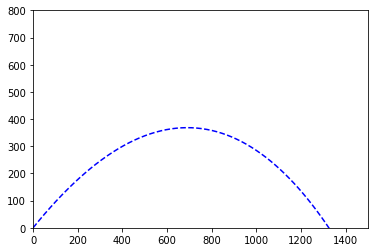

In [28]:
n_steps = 1000
thetas = numpy.arange(5, 90, 5) # the angles in degrees
for i in range(0,len(theta)):
    initial_conditions = [0, 0, 125*numpy.cos(thetas[i]*numpy.pi/180), numpy.sin(thetas[i]*numpy.pi/180)*125]    
    values_euler = solve_euler(initial_conditions, 300, n_steps)
    xs_euler, ys_euler = values_euler[:,0], values_euler[:,1]
    plt.plot(xs_euler, ys_euler, linestyle='--')
    plt.xlim(0,1500)
    plt.ylim(0,800);
    
    

Create a plot to show the range for different values of the initial velocity. Use the same angle $\theta=60^\circ$ for all velocities. The plot should have axis labels and a title and legend. Produce one curve with and one curve without the effect of air resistance. [5 marks]


In [23]:
n_steps = 1000
max_time = 300
v0s = numpy.linspace(50, 1000, 20)

ranges = []
ranges_noresistance = []
theta = numpy.deg2rad(60)

# Your code here


In [30]:

print(thetas)

[ 5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85]


In [168]:
print( history[0:1])


[[0. 0. 0. 0.]]


$\vec{F}_{\textrm{d}} = - \frac{1}{2} C_{\textrm{d}} \rho |\vec{v}|^{2} A \widehat{v}$